### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 9
### Due: Friday, Apr 18th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Part 1

 We know the equation should look like $Out=w_{1}x_{1}+w_{2}x_{2}+c$. This model should not learn any nonlinearities as we are only doing linear transformations. Testing the model confirms this. Each time it is run there is only linear fits.

## Part 2

We can see from the output that the model can learn nonlinearities. However, the model is not effective at describing the data. Below is an example run.

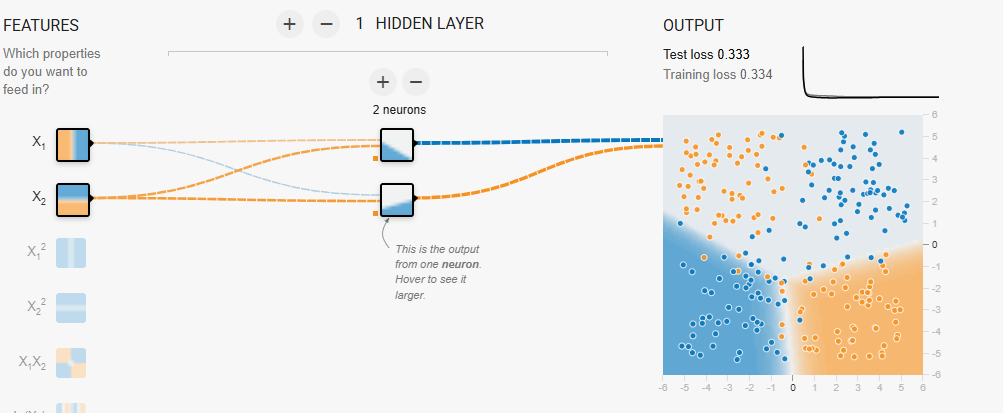

## Part 3

This configuartion can model the data succesfully. However it is only sucessful on some of the runs. For example some runs fail to model the data (image 1), while others work like the (image 2).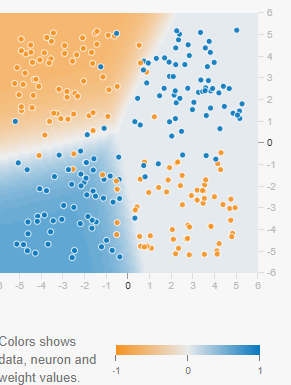 

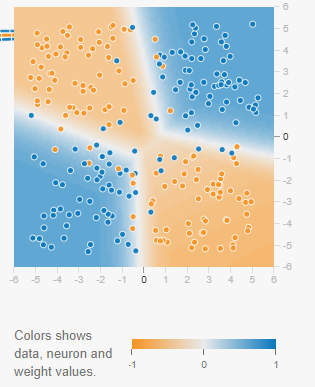

## Part 4

The best config I was able to achieve is shown below. I went through and changed config until I found the best one that had the least complexity. 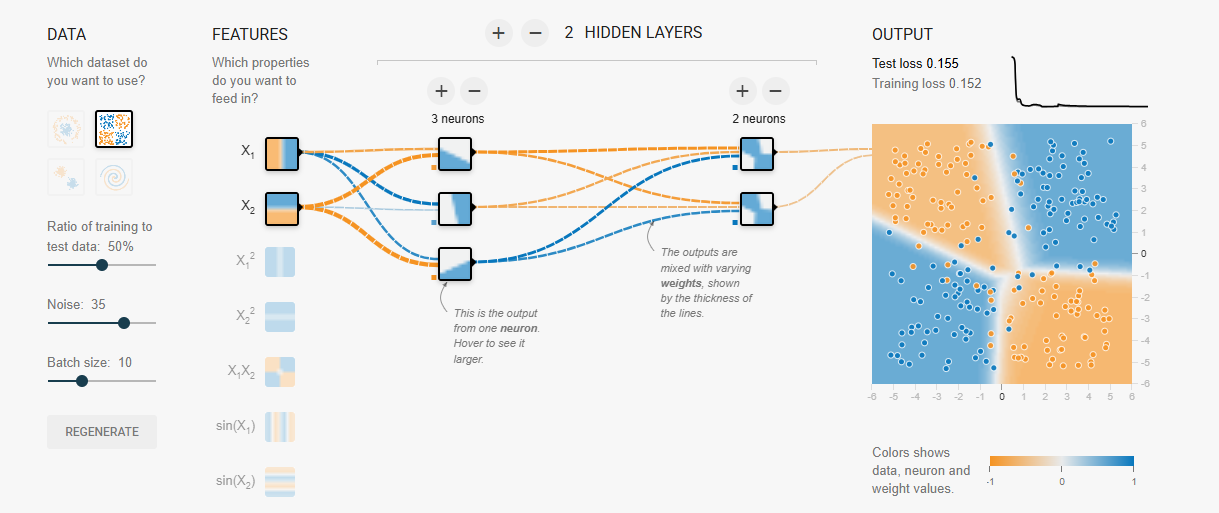

## Part 5, 6, 7 ,8

Changing the size of the model does seem to increase the convergence of the fit and can improve the quality. However the more complicated models seem to give a bad fit more often. I tested this by going through mulitply runs of the suggested configurations in parts 6,7,8.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [2]:
#import things
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy import optimize
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from scipy.stats import laplace
import corner
import numdifftools as nd
from scipy.stats import uniform
from scipy import stats
import numpy as np
import emcee

## Part 2.1

In [15]:
#1 same as HW8
#read in the data
data=np.load('../../../homeworks/hw_data/hw8_data_1.npy')
#get the coulumn names
c = data.dtype.names
print(c)
#this is a little different as we are only taking some of the data
#u-g
u=data['u']
g=data['g']
ug=np.subtract(u[::20],g[::20])
#g-r
r=data['r']
i=data['i']
z=data['z']
gr=np.subtract(g[::20],r[::20])
#r-i
ri=np.subtract(r[::20],i[::20])
#i-z
iz=np.subtract(i[::20],z[::20])
#redshift
red=data['redshift']
rederr=data['redshift_err']
newred=red[::20]
newrederr=rederr[::20]
#spectral
specs=data['specClass']
newspec=specs[::20]
#print(spec)

#counting to check amount of data
count1=0
for i in range(len(newspec)):
    if newspec[i]=="QSO":
        count1+=1
print('There are',count1,'QSO')

count2=0
for i in range(len(newspec)):
    if newspec[i]=="GALAXY":
        count2+=1
print('There are',count2,'Galaxies')

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
There are 370 QSO
There are 2130 Galaxies


## Part 2.2

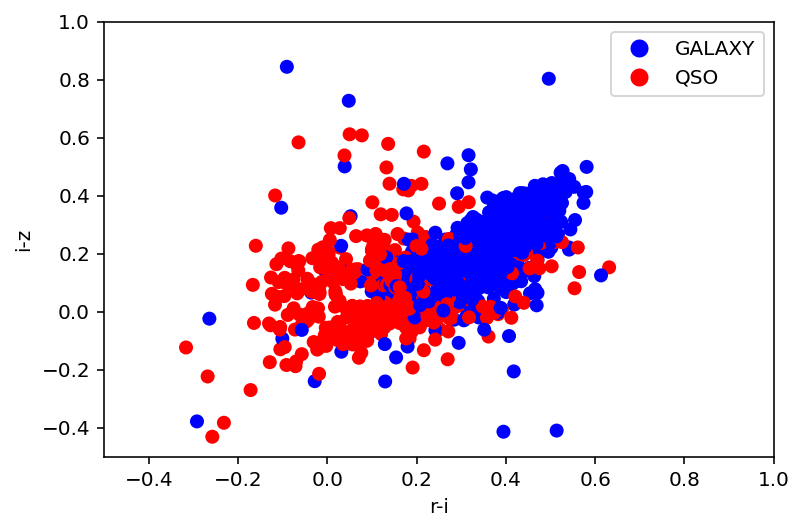

In [20]:
#same as HW8
# Color mapping
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
color_map = {'GALAXY': 'blue', 'QSO': 'red'}

# Create the scatter plot
plt.scatter(ri, iz, c=[color_map[spec] for spec in newspec]) #now ri and iz
plt.xlabel("r-i")
plt.ylabel("i-z")
#plt.title("")
plt.xlim(-.5,1)
plt.ylim(-.5,1)
#making a legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='GALAXY',
                          markerfacecolor='b', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='QSO',
                          markerfacecolor='r', markersize=10)]
plt.legend( handles=legend_elements)

## Part 2.3

In [22]:
#stacking 
#colors1=np.array(np.meshgrid(ug,gr)).T.reshape(-1,2)
colors = np.vstack((ri,iz)).T
print(colors)
#create array of labels
lables=[]
for i in range(len(newspec)):
    if newspec[i]=="QSO":
        lables.append(1)
    else:
        lables.append(0)
#print(lables)

[[0.02815 0.28811]
 [0.15165 0.21238]
 [0.39452 0.24098]
 ...
 [0.40386 0.15367]
 [0.26013 0.00375]
 [0.41424 0.31607]]


In [23]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=colors
y=lables
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42)
print(Xtrain)

[[ 0.40024  0.27616]
 [-0.12408  0.06141]
 [ 0.46882  0.23341]
 ...
 [ 0.44037  0.35587]
 [ 0.15323  0.14737]
 [ 0.40771  0.22136]]


## Part 2.4

In [24]:
#scale the data
#lecture 21
from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)
Xscaled = preprocessing.scale(X)

## Part 2.5

Text(0, 0.5, 'True Positive Rate')

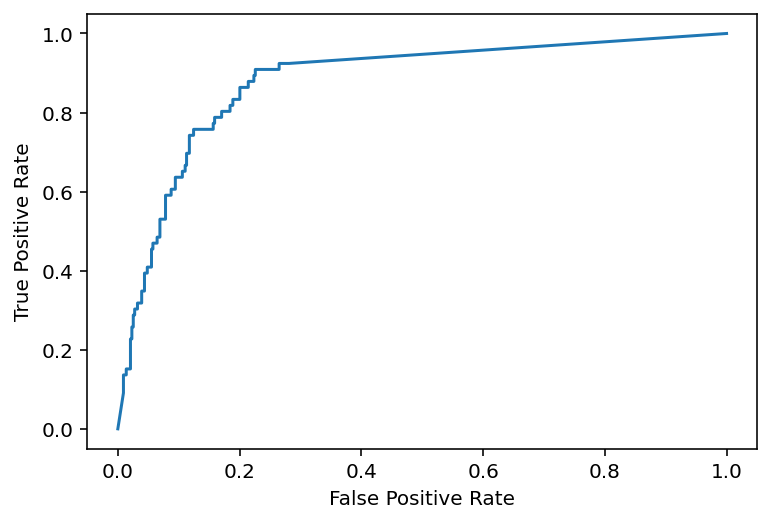

In [50]:
#again similar to hw8 no need for a loop
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# make the classifer multi layer perception
mlp= MLPClassifier(hidden_layer_sizes=(5, 2),  #layers of 5 and 2
    activation='relu',          #ReLu
    solver='sgd',               #gradient decent 
    max_iter=1000,              #1000
    random_state=42             #42
                  )
# train
mlp.fit(Xtrain_scaled, ytrain)

# Make predictions
y_pred = mlp.predict(Xtest_scaled)
y_prob = mlp.predict_proba(Xtest_scaled)[:, 1]

# Evaluate the model 
accuracy = (y_pred == ytest).mean() #left over from last week
#get the roc curve
fpr, tpr, thresh = roc_curve(ytest, y_prob)
precision, recall, thresh2 = precision_recall_curve(ytest, y_prob)

# add (0, 0) as first point
fpr = np.concatenate([[0], fpr])
tpr = np.concatenate([[0], tpr])
# Here we add (1,0) 
precision = np.concatenate([[0], precision])
recall = np.concatenate([[1], recall])
thresh2 = np.concatenate([[0], thresh2])
    
    
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.legend()

## Part 2.6

In [36]:
#create param grid
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier  
#set up classifier
mlp = MLPClassifier()
grid_search = GridSearchCV(mlp, parameters, cv=5)
#train
grid_search.fit(Xtrain, ytrain)
#get best ones
best_params = grid_search.best_params_
best_score = grid_search.best_score_

C:\Users\zachz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zachz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zachz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best score: 0.9355


C:\Users\zachz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [37]:
#print out the results
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best score: 0.9355


## Part 2.7

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# make the classifer multi layer perception now with best params
mlp= MLPClassifier(hidden_layer_sizes=(5, 5),  #layers of 5 and 5
    activation='tanh',          #tanh
    solver='lbfgs',               #lbfgs 
    max_iter=1000,              #1000
    random_state=42             #42
                  )
# Train the classifier
mlp.fit(Xtrain_scaled, ytrain)

# Make predictions
y_pred = mlp.predict(Xtest_scaled)
y_prob = mlp.predict_proba(Xtest_scaled)[:, 1]

# Evaluate the model 
accuracy = (y_pred == ytest).mean()
#get the roc curve
fpr1, tpr1, thresh = roc_curve(ytest, y_prob)
precision, recall, thresh2 = precision_recall_curve(ytest, y_prob)

# add (0, 0) as first point
fpr1 = np.concatenate([[0], fpr1])
tpr1 = np.concatenate([[0], tpr1])
# Here we add (1,0) 
precision = np.concatenate([[0], precision])
recall = np.concatenate([[1], recall])
thresh2 = np.concatenate([[0], thresh2])

C:\Users\zachz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


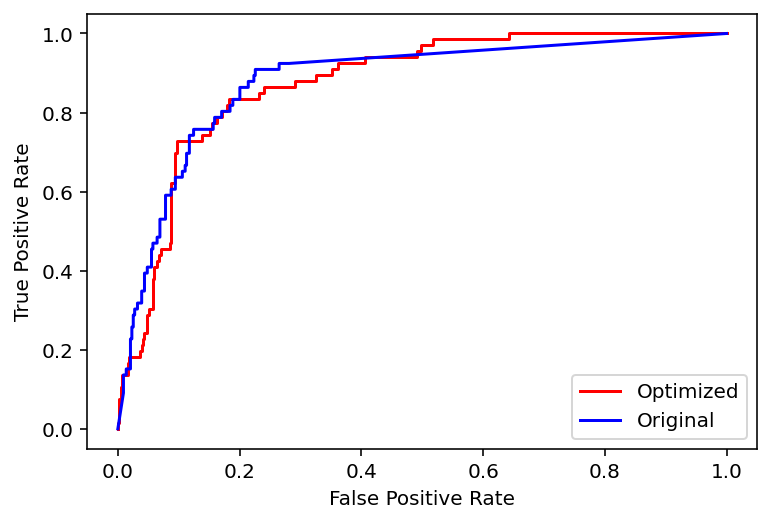

In [54]:
#plot the results
plt.plot(fpr1, tpr1,color='r',label='Optimized')
plt.plot(fpr, tpr,color='b',label="Original")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()